<a href="https://colab.research.google.com/github/akshatha-k/Code.fun.do.2019/blob/master/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! wget https://transfer.sh/Qt4sq/all_women.csv

In [0]:
'''
Code to perform preedictions and analse various data such as the number of women voters -districtwise, 
and the predicted number of women in the next election. Similarly other predictions include the correlation between
literacy and voter turnout , number of total voters, affect of poverty etc, thus enabling us to better understand factors affecting 
elections and expenditure'''

# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# perc 09 - Percentage of Women's votes over total votes polled - 2009
w_vote = pd.read_csv('all_women.csv', names = ['states','total','literacy01','literacy11','perc09','perc14'])

# Splitting the data into test and training tests in a 80:20 rati
x_train = w_vote.literacy01.values.reshape(-1,1)
y_train = w_vote.perc09.values

x_test = w_vote.literacy11.values.reshape(-1,1)
y_test = w_vote.perc14.values


In [0]:
# Fit a linear regression line of best fit on the data to predict votes
from sklearn.linear_model import LinearRegression
rf = LinearRegression()
rf.fit(x_train, y_train)

In [0]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# clf = Sequential()
# clf.add(Dense(8, input_dim = 1, activation = 'relu'))
# clf.add(Dense(4, activation = 'relu'))
# clf.add(Dense(1, activation="softmax"))
# clf.compile(loss='mean_squared_error', optimizer='adam')


# clf.fit(x_train, y_train, epochs=10000, batch_size=4)
# # y_pred = clf.predict(x_test, batch_size = 32)

# loss_and_metrics = clf.evaluate(x_test, y_test, batch_size=128)
# print(loss_and_metrics)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Random Forest Regression implementation to compare based on the common metrics
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
rf.fit(x_train, y_train)

In [0]:
# Computer the errors using popular error metrics
y_pred = rf.predict(x_test)
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 8.752324632950579
Mean Squared Error: 110.82086306865557
Root Mean Squared Error: 10.527148857532868


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


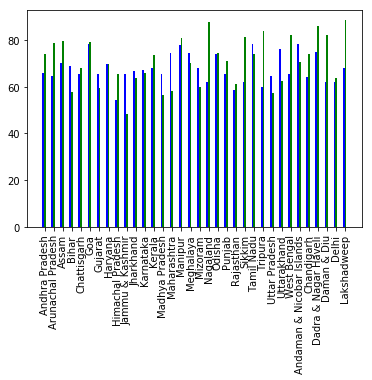

In [0]:
#Visualisations to better understand the data
x = np.arange(34)
plt.xticks(x, w_vote.states,rotation='vertical')

ax = plt.subplot(111)
ax.bar(x-0.2, y_pred, width=0.2, color='b', align='center')
ax.bar(x, y_test, width=0.2, color='g', align='center')
# plt.scatter(x, y_pred)
# plt.scatter(x, y_test)
plt.show() 